<a href="https://colab.research.google.com/github/MaiteMotter/Data-Science/blob/main/ProyectoDS_ParteI_Motter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science CoderHouse 60905


### Maite Motter

##Introducción
La evaluación de la satisfacción de los pasajeros en las aerolíneas estadounidenses es de suma importancia para la industria aérea en la gestión de la calidad del servicio. La capacidad de comprender y predecir los factores que influyen en la satisfacción del cliente permite a las aerolíneas tomar medidas proactivas para mejorar la experiencia del pasajero y mantener su competitividad en el mercado. En este contexto, el presente estudio se centra en analizar una encuesta de satisfacción de pasajeros de aerolíneas estadounidenses y en la construcción de un modelo predictivo que permita identificar los principales determinantes de la satisfacción del cliente.

## Descripción del Problema

La satisfacción de los pasajeros en las aerolíneas estadounidenses es un aspecto fundamental para la industria de la aviación, ya que influye directamente en la reputación de las compañías y su competitividad en el mercado. Identificar los factores que contribuyen a la satisfacción del cliente y comprender cómo estos afectan la percepción global del servicio es esencial para las aerolíneas en la mejora continua de su calidad y la retención de clientes. En este contexto, el análisis de la encuesta de satisfacción de pasajeros de aerolíneas estadounidenses y la identificación de tendencias y patrones en los datos pueden proporcionar información valiosa para abordar áreas de mejora específicas y optimizar la experiencia del cliente, lo que a su vez puede conducir a una mayor fidelización de los pasajeros y un aumento de la rentabilidad para las aerolíneas.

## Objetivo

El objetivo principal de este estudio es desarrollar un modelo predictivo que pueda identificar los principales factores que influyen en la satisfacción de los pasajeros de aerolíneas estadounidenses. Para alcanzar este objetivo, se llevará a cabo un análisis exhaustivo de la encuesta de satisfacción de los pasajeros, con el fin de comprender en profundidad las variables y tendencias presentes en los datos. Además, se procederá a la construcción y evaluación de modelos predictivos que permitan predecir la satisfacción del cliente en función de diferentes atributos, con el propósito de proporcionar a las aerolíneas estadounidenses valiosas oportunidades para mejorar la calidad de su servicio y la experiencia del pasajero.


## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/johndddddd/customer-satisfaction/data

Este conjunto de datos ofrece una visión completa de la satisfacción de los pasajeros en las aerolíneas estadounidenses, abarcando una amplia gama de variables que incluyen la evaluación de servicios a bordo, comodidades ofrecidas, facilidades de reserva, así como datos demográficos como la edad y el género de los pasajeros. Estos atributos detallados proporcionan una base sólida para realizar un análisis exhaustivo y construir un modelo predictivo que pueda identificar los factores clave que influyen en la satisfacción del cliente. La diversidad de información contenida en este conjunto de datos permite una exploración profunda de las experiencias de los pasajeros y la posibilidad de desarrollar estrategias efectivas para mejorar la calidad del servicio y optimizar la experiencia del viajero en las aerolíneas estadounidenses.

## Importación de Librerías y Carga de Datos


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import xlrd

In [19]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_excel('/content/drive/MyDrive/datasets/satisfaction_2015.xlsx')
df.head(2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0


## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

El conjunto de datos contiene un total de 129880 filas (registros) y 24 columnas (1 de identificación ID y 23 de variables).

Se observa que una de las columnas tiene valores faltantes (non-null count menor que el número total de filas). Estos valores faltantes pueden requerir un manejo especial durante el preprocesamiento de datos.



---

###**Variables del DATASET**
Descripción de las variables consideradas en la encuesta de satisfacción:

1. Satisfacción: Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)
2. Edad: La edad real de los pasajeros.
3. Género: Género de los pasajeros (Mujer, Hombre)
4. Tipo de Viaje: Objeto del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)
5. Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)
6. Tipo de cliente: El tipo de cliente (cliente leal, cliente desleal)
7. Distancia de vuelo: La distancia de vuelo de este viaje.
8. Servicio wifi a bordo: Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5)
9. Facilidad de reserva en línea: Nivel de satisfacción de la reserva en línea
10. Servicio a bordo: Nivel de satisfacción del servicio a bordo
11. Embarque online: Nivel de satisfacción del embarque online
12. Entretenimiento a bordo: Nivel de satisfacción del entretenimiento a bordo
13. Comida y bebida: Nivel de satisfacción de Comida y bebida
14. Comodidad del asiento: Nivel de satisfacción con la comodidad del asiento
15. Servicio de habitaciones para piernas: Nivel de satisfacción del servicio de habitaciones para piernas
16. Hora de salida/llegada conveniente: Nivel de satisfacción de la hora de salida/llegada conveniente
17. Manejo de equipaje: Nivel de satisfacción en el manejo de equipaje
18. Ubicación de la puerta: Nivel de satisfacción con la ubicación de la puerta
19. Limpieza: Nivel de satisfacción de la limpieza.
20. Servicio de Check-in: Nivel de satisfacción del servicio de Check-in
21. Retraso de salida en minutos: Minutos de retraso a la salida
22. Retraso de llegada en minutos: Minutos de retraso cuando llega
23. Vuelo cancelado: Si el Vuelo cancelado o no (Sí, No)


###**Variables Potencialmente Relevantes:**

A continuación se analizan algunas variables que podrían ser relevantes para predecir  los principales factores que influyen en la satisfacción de los pasajeros de aerolíneas estadounidenses.


In [25]:
df[['Age', 'Gender', 'Inflight wifi service', 'Ease of Online booking', 'Baggage handling', 'Checkin service']].describe()



,Age,Inflight wifi service,Ease of Online booking,Baggage handling,Checkin service
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,2.728696,2.756876,3.632114,3.306267
std,15.119360,1.329340,1.401740,1.180025,1.266185
min,7.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,2.000000,2.000000,3.000000,3.000000
50%,40.000000,3.000000,3.000000,4.000000,3.000000
75%,51.000000,4.000000,4.000000,5.000000,4.000000
max,85.000000,5.000000,5.000000,5.000000,5.000000


Estos son los resultados de un análisis descriptivo para varias variables.

**Age (Edad):** La edad promedio de los pasajeros en el conjunto de datos es de aproximadamente 39 años. La edad mínima registrada es de 7 años y la máxima es de 85 años.

**Inflight wifi service (Servicio wifi a bordo):** El nivel promedio de satisfacción del servicio wifi a bordo es de aproximadamente 2.73, con una desviación estándar de aproximadamente 1.33. El valor mínimo registrado es 0 (posiblemente indicando un servicio no disponible o muy insatisfactorio), mientras que el valor máximo es 5 (muy satisfecho).

**Ease of Online booking (Facilidad de reserva en línea):** La facilidad promedio de reserva en línea es de aproximadamente 2.76, con una desviación estándar de aproximadamente 1.40. La puntuación mínima es 0 (posiblemente indicando una dificultad extrema para reservar en línea) y la máxima es 5 (muy fácil de reservar en línea).

**Baggage handling (Manejo de equipaje):** La calificación promedio del manejo de equipaje es de aproximadamente 3.63, con una desviación estándar de aproximadamente 1.18. La puntuación mínima es 1 (posiblemente indicando un manejo deficiente o problemas con el equipaje) y la máxima es 5 (manejo de equipaje excelente).

**Checkin service (Servicio de check-in):** El nivel promedio de satisfacción del servicio de check-in es de aproximadamente 3.31, con una desviación estándar de aproximadamente 1.27. La puntuación mínima es 0 (posiblemente indicando un servicio muy insatisfactorio) y la máxima es 5 (muy satisfecho con el servicio de check-in).

Estas estadísticas proporcionan una idea general de la distribución y variabilidad de cada dimensión analizada dentro del conjunto de datos, lo que puede ayudar a identificar áreas de mejora que estamos buscando.

### Preguntas de relevancia e Hipótesis planteadas

**1.** ¿Existe una relación entre la edad de los pasajeros y su nivel de satisfacción con el servicio de wifi a bordo?

*Hipótesis 1:* Los pasajeros más jóvenes podrían estar más satisfechos con el servicio de wifi a bordo en comparación con los pasajeros de mayor edad.

**2.** ¿Existe una relación entre la distancia del vuelo y la satisfacción con el servicio de entretenimiento a bordo?

*Hipótesis 2:* Los pasajeros en vuelos de larga distancia podrían mostrar una mayor satisfacción con el servicio de entretenimiento a bordo en comparación con los pasajeros en vuelos de corta distancia.

###Análisis por género y edad de los pasajeros

In [28]:
print('Las posibles categorías de género son:', df['Gender'].value_counts())


Las posibles categorías de género son: Female    65899
Male      63981
Name: Gender, dtype: int64


Este análisis descriptivo inicial revela que de los 129,880 pasajeros analizados, la muestra parece ser sólida ya que hay una distribución equitativa entre mujeres y hombres. Con 65,899 mujeres y 63,981 hombres, los datos muestran una representación balanceada de género en la muestra, lo que sugiere que las conclusiones extraídas de este análisis pueden considerarse confiables y representativas de la población de pasajeros de aerolíneas estadounidenses.

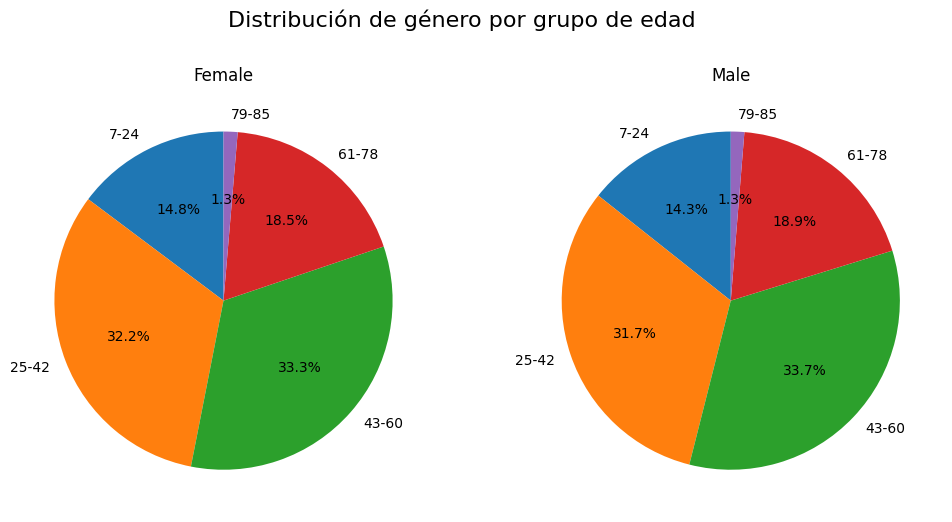

In [42]:
# Definir los límites de los grupos de edad
age_bins = np.linspace(7, 85, 6)

# Etiquetas para los grupos de edad
age_labels = ['7-24', '25-42', '43-60', '61-78', '79-85']

# Crear una nueva columna en el DataFrame para el grupo de edad
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Agrupar por género y grupo de edad, y contar el número de pasajeros en cada combinación
gender_age_counts = df.groupby(['Gender', 'Age Group']).size().unstack(fill_value=0)

# Obtener etiquetas de los grupos de edad
labels = gender_age_counts.columns

# Crear un gráfico de torta para cada género
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (gender, counts) in enumerate(gender_age_counts.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(gender)

# Agregar título
plt.suptitle('Distribución de género por grupo de edad', fontsize=16)

# Mostrar el gráfico
plt.show()


El análisis del gráfico nos ayuda a comprender cómo se distribuyen los géneros en diferentes grupos de edad, lo que puede proporcionar información útil sobre la demografía de los pasajeros y ayudar en la toma de decisiones relacionadas con el marketing, el servicio al cliente y otras áreas.

En terminos generales, se puede observar comparativamente que entre los distintos rangos etarios seleccionados la tendencia entre géneros es equitativa, osbservandose una preponderancia etaria entre los pasajeros de 25 a 60 años para ambos géneros.

###Relación entre la edad de los pasajeros y su nivel de satisfacción con el servicio de wifi a bordo

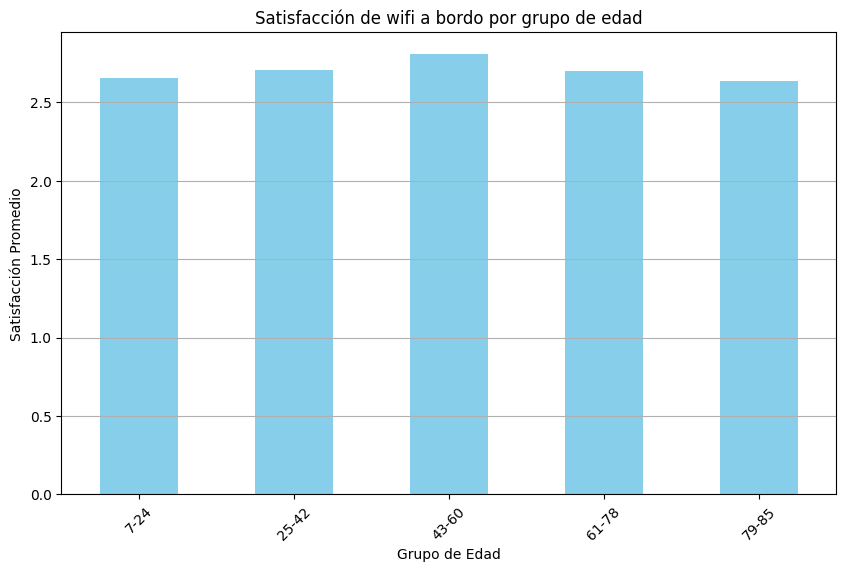

In [32]:
# Definir los límites de los grupos de edad
age_bins = np.linspace(7, 85, 6)

# Etiquetas para los grupos de edad
age_labels = ['7-24', '25-42', '43-60', '61-78', '79-85']

# Crear una nueva columna en el DataFrame para el grupo de edad
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Filtrar los datos por valores de Inflight wifi service y la nueva columna de grupo de edad
filtered_df = df[(df['Inflight wifi service'] >= 0)]

# Calcular los promedios de satisfacción del wifi a bordo para cada grupo de edad
wifi_satisfaction_by_age = filtered_df.groupby('Age Group')['Inflight wifi service'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
wifi_satisfaction_by_age.plot(kind='bar', color='skyblue')
plt.title('Satisfacción de wifi a bordo por grupo de edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Satisfacción Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Basándonos en el gráfico de barras que muestra la satisfacción promedio del servicio wifi a bordo por grupo de edad, se puede observar que:

En general, parece haber una tendencia positiva en la satisfacción con el servicio wifi a bordo a medida que aumenta la edad. Los grupos de edad más avanzada tienden a mostrar una satisfacción ligeramente mayor en comparación con los grupos de edad más jóvenes.

El análisis también sugiere la importancia de considerar otros factores y segmentos de la población para comprender completamente las necesidades y preferencias de los pasajeros en relación con este servicio, como puede ser el motivo del viaje del pasajero (Viaje Personal vs Viaje de Negocios). Esto puede proporcionar información valiosa sobre áreas de mejora en la prestación del servicio wifi a bordo, como ajustes en la calidad de la conexión, la facilidad de uso o la disponibilidad del servicio en diferentes tipos de vuelos.

###Relación entre la distancia del vuelo y la satisfacción con el servicio de entretenimiento a bordo:



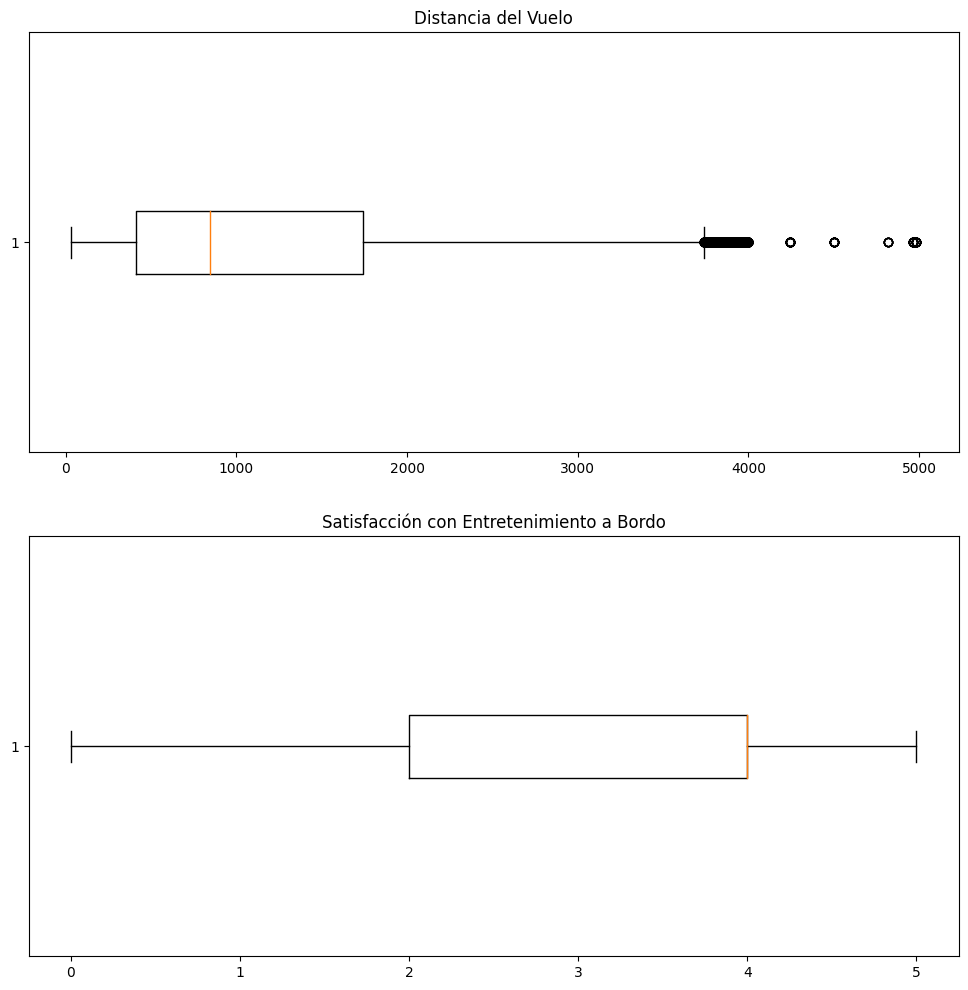

In [43]:
# Filtrar los datos para la satisfacción con el servicio de entretenimiento a bordo
satisfaction_data = df[['Flight Distance', 'Inflight entertainment']]

# Crear un subplot con dos boxplots paralelos
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Boxplot para Satisfacción con servicio de entretenimiento a bordo
axes[0].boxplot(satisfaction_data['Flight Distance'], vert=False)
axes[0].set_title('Distancia del Vuelo')

# Boxplot para Distancia del Vuelo
axes[1].boxplot(satisfaction_data['Inflight entertainment'], vert=False)
axes[1].set_title('Satisfacción con Entretenimiento a Bordo')

plt.show()

No se puede sacar una conclusión definitiva sobre la relación entre la distancia del vuelo y la satisfacción con el entretenimiento a bordo con la información aportada por el gráfico de cajas y bigotes. Solo se puede destacar que la satisfacción promedio con el entretenimiento a bordo está por encima del punto medio de la escala (que es 2.5 en una escala del 0 al 5), lo que sugiere que en general, los pasajeros parecen estar satisfechos con este aspecto del servicio, incluso con la variabilidad en las distancias de vuelo.

Para comprender mejor la relación entre estas dos variables, resulta más pertinente realizar un análisis más detallado a través de un gráfico de dispersión. Esto nos permitirá identificar cualquier patrón o tendencia que pueda existir entre estas dos variables.

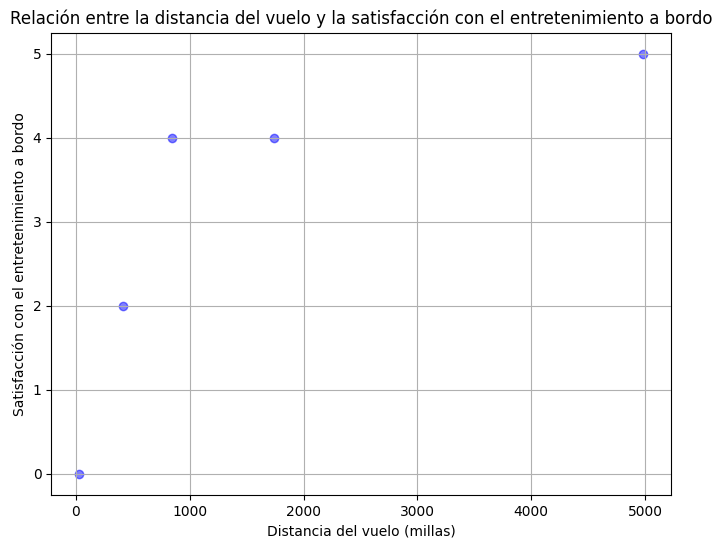

In [46]:
# Extraer datos de distancia de vuelo y satisfacción con el entretenimiento a bordo
flight_distance = [31, 414, 844, 1744, 4983]  # Datos de distancia de vuelo
entertainment_satisfaction = [0, 2, 4, 4, 5]   # Datos de satisfacción con el entretenimiento a bordo

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(flight_distance, entertainment_satisfaction, color='blue', alpha=0.5)

# Etiquetas y título
plt.xlabel('Distancia del vuelo (millas)')
plt.ylabel('Satisfacción con el entretenimiento a bordo')
plt.title('Relación entre la distancia del vuelo y la satisfacción con el entretenimiento a bordo')

# Mostrar el gráfico
plt.grid(True)
plt.show()

En términos generales podemos afirmar que a mayor distancia de vuelo, mayor es la satisfacción expresada sobre el entretenimiento a bordo.

###Otras variables de relevancia

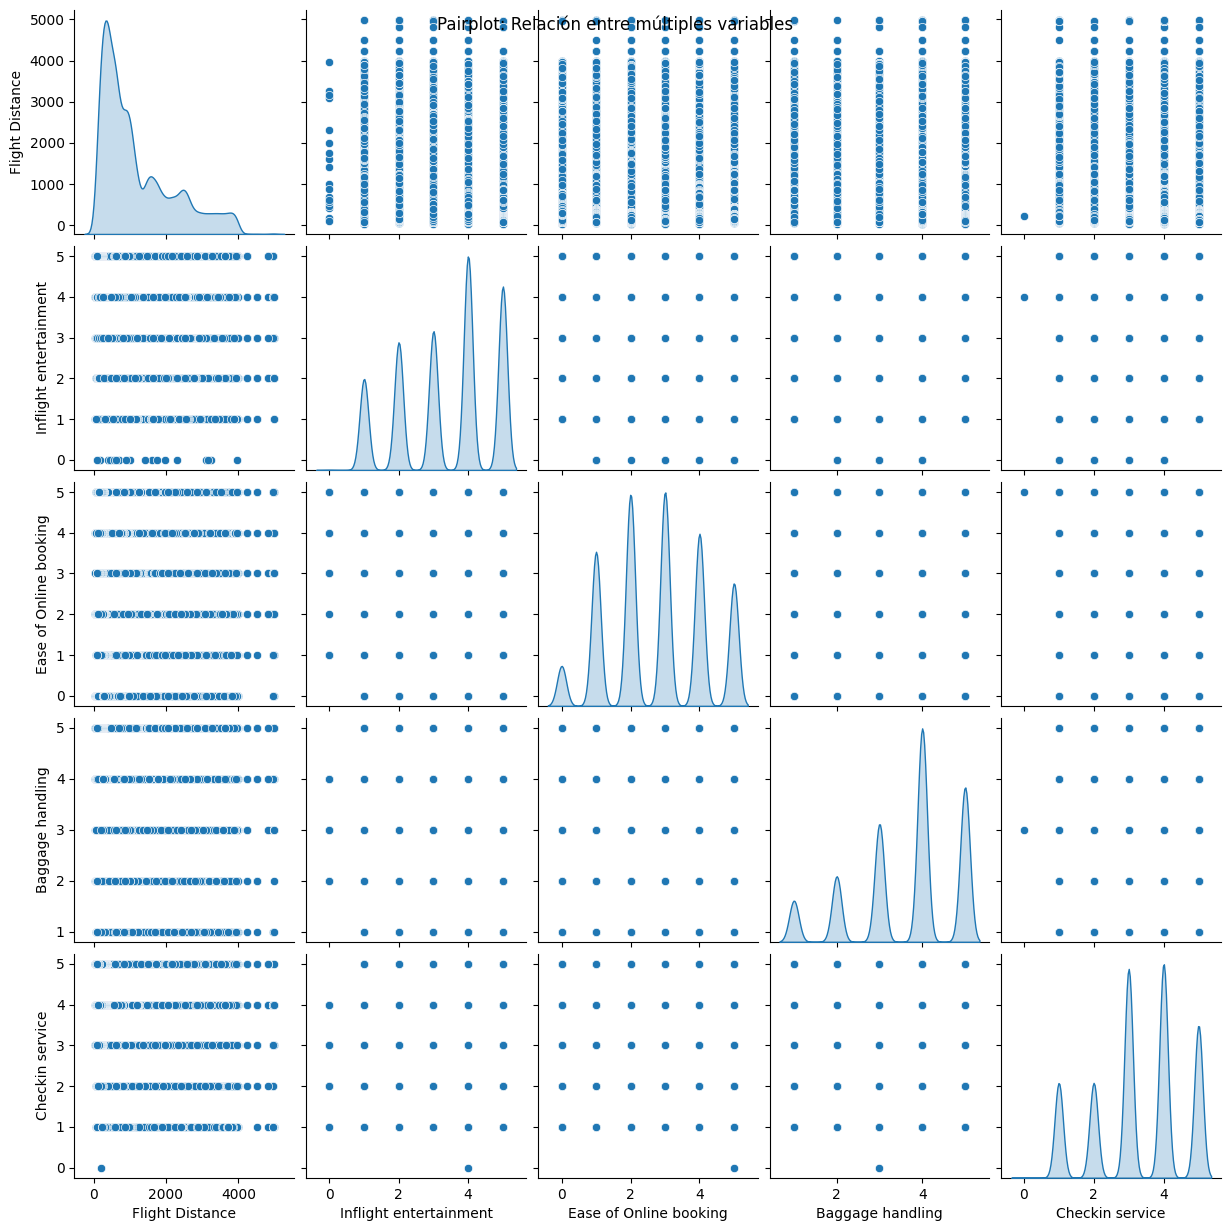

In [47]:
# Seleccionar las variables de interés
variables_of_interest = ['Flight Distance', 'Inflight entertainment', 'Ease of Online booking', 'Baggage handling', 'Checkin service']

# Crear un pairplot
sns.pairplot(df[variables_of_interest], diag_kind='kde')

# Ajustar las etiquetas y títulos
plt.suptitle('Pairplot: Relación entre múltiples variables')
plt.show()

Algunas conclusiones generales que se pueden avisorar y profundizar en futuros analisis son:

Los pasajeros que califican positivamente la facilidad de reserva en línea también tienden a dar calificaciones más altas en otras áreas de servicio, como el entretenimiento a bordo o la comodidad del asiento.
La facilidad de reserva en línea está correlacionada con el tipo de viaje del pasajero, con pasajeros de viajes de negocios que tienden a calificarla más alta que los pasajeros de viajes personales.
La satisfacción con el manejo del equipaje está relacionada con la puntualidad de los vuelos, ya que los pasajeros que experimentan retrasos en la entrega de su equipaje probablemente califiquen más bajo este aspecto.
La satisfacción con el manejo del equipaje puede variar según la clase de viaje, con pasajeros de clase ejecutiva que esperan un manejo de equipaje más eficiente en comparación con los pasajeros de clase económica.
La satisfacción con el servicio de check-in puede estar influenciada por la disponibilidad de opciones de check-in en línea y la eficiencia del proceso de check-in en el aeropuerto.
La satisfacción con el servicio de check-in puede variar según el tamaño del aeropuerto, con pasajeros de aeropuertos más grandes que pueden experimentar tiempos de espera más largos y, por lo tanto, pueden calificar más bajo este aspecto en comparación con los pasajeros de aeropuertos más pequeños.